# Q1 Estimation of pi

1.   Value of Pi
2.   Variation with Number of trials



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
N = 10000                        #total number of runs
no_of_points_lying_inside = 0
x = np.random.uniform(0,1,N)     #taking N random uniform variables within 0 and 1
y = np.random.uniform(0,1,N)     
Xin = []                         #X_coordinates lying inside
Yin = []                         #Y_coordinates lying inside
Xout = []                         #X_coordinates lying outside
Yout = []                         #Y coordinates lying outside
value_estimated = []             #Value estimated array after each run
for i in range(N):
  if(math.sqrt(x[i]*x[i]+y[i]*y[i] < 1)):  #checking if the point lies inside the circle
    no_of_points_lying_inside+=1           
    Xin.append(x[i])
    Yin.append(y[i])
    #if(i>10):
    value_estimated.append(4*no_of_points_lying_inside/(i+1))
  else:
    Xout.append(x[i])
    Yout.append(y[i])
#no_of_points_lying_inside = len(Xin)
pi = 4*no_of_points_lying_inside/N
print("Value of pi:", pi)

Value of pi: 3.1472


SCATTER PLOT FOR ESTIMATION OF PI

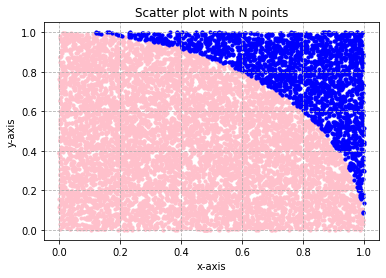

In [5]:
plt.scatter(Xin,Yin,c='pink',s=10)
plt.scatter(Xout,Yout,c='blue',s=10)
#plt.plot(x,y, color = "red")
plt.title('Scatter plot with N points')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid(alpha=1,linestyle='--')
plt.show()

VARIATION OF VALUE WITH NUMBER OF TRIALS

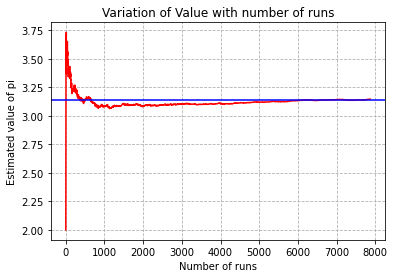

In [6]:
plt.plot(value_estimated, color = "red")
plt.axhline(np.pi, color = "blue")
plt.title('Variation of Value with number of runs')
plt.xlabel('Number of runs')
plt.ylabel('Estimated value of pi')
plt.grid(alpha=1,linestyle='--')
plt.show()

# Q2 Estimation of Stock Price

In [7]:
import random
from matplotlib import pyplot as plt

In [8]:
trials = 0
No_of_runs = 10000
data = []             #array to store estimated value
for i in range(No_of_runs):
    curr = 100        #current value of stock price
    while True:               
        if random.random() > 0.5: #taking a value of +1 or -1 with probability 0.5
            curr += 1             
        else:
            curr -= 1
        if curr == 96:
            break
        elif curr == 102:     #favorable condition
            trials += 1
            break;
    data.append(trials/(i+1))     
print("Estimated value of Probability:",trials/No_of_runs)

Estimated value of Probability: 0.6607


Value of runs after which data converges

In [9]:
index = 0
i = 0
while(i<No_of_runs):
  if(abs(data[i]-2/3)>0.01): 
     index = i
  i+=1
print("Numbers of runs to get to the converged value:",index)

Numbers of runs to get to the converged value: 1271


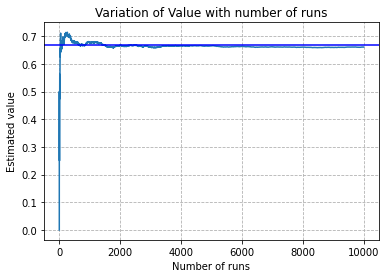

In [10]:
plt.plot(data)
plt.axhline(2/3, color = "blue")
plt.title('Variation of Value with number of runs')
plt.xlabel('Number of runs')
plt.ylabel('Estimated value')
plt.grid(alpha=1,linestyle='--')
#plt.plot(data,color = "red")
plt.show()

# Q3 BSM Pricing

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.stats import norm

In [12]:
sigma = 0.15              #volatality
T = 1/12                  #Total time to maturity= 30 days = 1/12 of a year
r = 0.02                  #risk free rate
K = 180                   #strike price
St = 200                  #stock price at time t
d1 = (np.log(St/K) + (r + (sigma*sigma)/2)*(T))/(sigma*np.sqrt(T))
d2 = d1 - sigma*np.sqrt(T)
N_d1 =  sp.stats.norm.cdf(d1)
N_d2 =  sp.stats.norm.cdf(d2)
C = N_d1*St - N_d2*K*np.exp(-r*(T))
print("Call option price using BSM:",C)

Call option price using BSM: 20.317700916589644


# Q4 Discrete Time Brownian Motion of Stock Price

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.stats import norm
import math

In [14]:
K = 180                       #strike price
mu = 0.02                     #risk free rate 
sigma = 0.15                  #volatality
T = 1/12                      #Total time to maturity= 30 days = 1/12 of a year
No_of_time_steps = 240        #time steps in one simulation
delta_t = T/No_of_time_steps  #time difference between calculation of fluctuation in price
N = 100000                   #Number of Simulations
curr_value_of_option = []     #Array to store the final answer

x = math.exp((mu-(sigma**2)/2)*delta_t)
temp=sigma*np.sqrt(delta_t)
mut = math.exp(-mu*T)         #to calculate present value of the future calculated call option
for i in range(N):
    curr = 0                  #number of timesteps completed
    So = 200                  #initial value of stock price
    epsilon_arr = np.random.normal(0,1,240) #array of 240 random normal variables
    while(curr<240):
      epsilon = epsilon_arr[curr]   #value of random variable considered in ith timestep
      y = math.exp(epsilon*temp)    
      S = So*x*y                    #formula for each time-step
      So = S                        #s is updated after each timestep
      curr+=1
    curr_value_of_option.append(mut*np.maximum(S-K,0)) #value of call option brought to present value
estimated_value = np.mean(curr_value_of_option)        #mean of the array for call option
print("Estimated Value of call option using Brownian Motion:",estimated_value)

Estimated Value of call option using Brownian Motion: 20.34811328021963


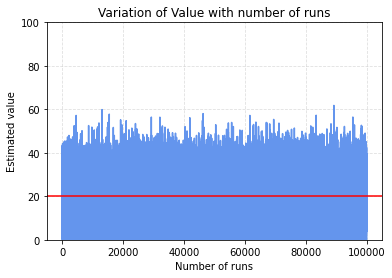

In [18]:
plt.plot(curr_value_of_option, color = "cornflowerblue")
plt.axhline(20.31, color = "red")
#plt.axhline(estimated_value, color = "pink")
plt.ylim(0, 100)
plt.title('Variation of Value with number of runs')
plt.xlabel('Number of runs')
plt.ylabel('Estimated value')
plt.grid(alpha=0.4,linestyle='--')
plt.show()